In [45]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import community

In [16]:
# Read connections from the file
file_path = "connections.txt"
with open(file_path, "r") as file:
    edges = [line.strip().split() for line in file]

### 1. Create a Directed graph 

In [17]:
# Create a directed graph
graph = nx.DiGraph()

# Add edges to the graph
graph.add_edges_from(edges)

### 2. Show which nodes are bridges. 

In [19]:
def dfs(graph, node, discovery_time, low_link, visited, parent, bridges):
    visited[node] = True
    discovery_time[node] = dfs.time
    low_link[node] = dfs.time
    dfs.time += 1

    for neighbor in graph.neighbors(node):
        if not visited[neighbor]:
            dfs(graph, neighbor, discovery_time, low_link, visited, node, bridges)
            low_link[node] = min(low_link[node], low_link[neighbor])

            if low_link[neighbor] > discovery_time[node]:
                bridges.append((node, neighbor))
        elif neighbor != parent:
            low_link[node] = min(low_link[node], discovery_time[neighbor])

In [20]:
# Initialize variables for Tarjan's algorithm
dfs.time = 0
discovery_time = {node: -1 for node in graph.nodes}
low_link = {node: -1 for node in graph.nodes}
visited = {node: False for node in graph.nodes}
bridges = []

# Run Tarjan's algorithm
for node in graph.nodes:
    if not visited[node]:
        dfs(graph, node, discovery_time, low_link, visited, None, bridges)

print("Bridges:", bridges)

Bridges: [('323', '332'), ('323', '341'), ('322', '323'), ('322', '329'), ('339', '340'), ('339', '347'), ('322', '339'), ('322', '342'), ('322', '345'), ('290', '322'), ('280', '290'), ('280', '291'), ('280', '297'), ('308', '338'), ('280', '304'), ('277', '280'), ('277', '285'), ('277', '294'), ('311', '344'), ('277', '311'), ('168', '277'), ('158', '168'), ('320', '346'), ('271', '298'), ('239', '295'), ('158', '232'), ('158', '242'), ('158', '248'), ('158', '317'), ('142', '158'), ('222', '240'), ('203', '270'), ('142', '161'), ('142', '169'), ('142', '170'), ('123', '142'), ('122', '123'), ('557', '570'), ('555', '557'), ('553', '555'), ('561', '565'), ('679', '682'), ('678', '679'), ('678', '685'), ('639', '678'), ('637', '639'), ('651', '683'), ('1888', '1891'), ('1902', '1911'), ('1898', '1902'), ('1888', '1898'), ('1879', '1888'), ('1864', '1879'), ('1845', '1864'), ('1843', '1845'), ('1842', '1843'), ('1842', '1849'), ('1842', '1861'), ('1868', '1900'), ('1842', '1868'), ('18

### 3. Show the density of the graph. Comment about your findings

In [21]:
# Calculate and print the density
graph_density = nx.density(graph)
print("Graph Density:", graph_density)

Graph Density: 0.0054099817517196435


Graph density is a measure that represents the ratio of the number of edges present in the graph to the total number of possible edges. In this context, it indicates how connected the nodes are in the graph.

A density close to 0 suggests a sparse graph, meaning there are relatively few edges compared to the total possible edges. On the other hand, a density close to 1 indicates a dense graph with many edges, implying a higher level of connectivity.

In our case, the graph density of 0.0054 suggests that the graph is sparse, meaning that only a small fraction of possible connections between nodes is present.

### 4. Show which nodes have the highest and lowest number of connections.

In [22]:
# Calculate degrees for each node
degrees = dict(graph.degree())

# Find nodes with the highest and lowest degrees
max_degree_node = max(degrees, key=degrees.get)
min_degree_node = min(degrees, key=degrees.get)

# Print nodes with the highest and lowest degrees
print("Node with the Highest Degree:", max_degree_node, "Degree:", degrees[max_degree_node])
print("Node with the Lowest Degree:", min_degree_node, "Degree:", degrees[min_degree_node])

Node with the Highest Degree: 107 Degree: 1045
Node with the Lowest Degree: 11 Degree: 1


### 5. Show which nodes have the highest incoming and outgoing connections 

In [23]:
# Calculate in-degrees and out-degrees for each node
in_degrees = dict(graph.in_degree())
out_degrees = dict(graph.out_degree())

# Find nodes with the highest in-degrees and out-degrees
max_in_degree_node = max(in_degrees, key=in_degrees.get)
max_out_degree_node = max(out_degrees, key=out_degrees.get)

# Print nodes with the highest in-degrees and out-degrees
print("Node with the Highest In-Degree:", max_in_degree_node, "In-Degree:", in_degrees[max_in_degree_node])
print("Node with the Highest Out-Degree:", max_out_degree_node, "Out-Degree:", out_degrees[max_out_degree_node])

Node with the Highest In-Degree: 1888 In-Degree: 251
Node with the Highest Out-Degree: 107 Out-Degree: 1043


### 6. Show which nodes have the highest closeness, betweenness, and eigenvector | Interpret your findings

In [25]:
# Calculate centrality measures for each node
closeness_centralities = nx.closeness_centrality(graph)
betweenness_centralities = nx.betweenness_centrality(graph)

# Specify a higher number of iterations for eigenvector centrality
eigenvector_centralities = nx.eigenvector_centrality(graph, max_iter=500)

# Find nodes with the highest closeness, betweenness, and eigenvector centralities
max_closeness_node = max(closeness_centralities, key=closeness_centralities.get)
max_betweenness_node = max(betweenness_centralities, key=betweenness_centralities.get)
max_eigenvector_node = max(eigenvector_centralities, key=eigenvector_centralities.get)

# Print nodes with the highest centrality measures
print("Node with the Highest Closeness Centrality:", max_closeness_node, "Closeness Centrality:", closeness_centralities[max_closeness_node])
print("Node with the Highest Betweenness Centrality:", max_betweenness_node, "Betweenness Centrality:", betweenness_centralities[max_betweenness_node])
print("Node with the Highest Eigenvector Centrality:", max_eigenvector_node, "Eigenvector Centrality:", eigenvector_centralities[max_eigenvector_node])


Node with the Highest Closeness Centrality: 2642 Closeness Centrality: 0.11797503012816456
Node with the Highest Betweenness Centrality: 1684 Betweenness Centrality: 0.03299985344063623
Node with the Highest Eigenvector Centrality: 2655 Eigenvector Centrality: 0.802704299670652


#### Closeness Centrality:

Node 2642 has the highest closeness centrality with a value of 0.117975. Closeness centrality measures how quickly a node can reach all other nodes in the network. In this case, node 2642 is relatively central in terms of closeness, indicating that it can efficiently reach other nodes in the network.

#### Betweenness Centrality:

Node 1684 has the highest betweenness centrality with a value of 0.032999. Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes. Node 1684 plays a crucial role in connecting different parts of the network, serving as a bridge in the flow of information.

#### Eigenvector Centrality:

Node 2655 has the highest eigenvector centrality with a value of 0.802704. Eigenvector centrality considers not only the number of connections a node has but also the importance of those connections. Node 2655 is considered highly central in terms of eigenvector centrality, suggesting that it is connected to other nodes that are themselves well-connected.

##### In summary, these centrality measures provide insights into different aspects of node importance in the network. Node 2642 is close to other nodes, node 1684 lies on important paths between nodes, and node 2655 has connections to other well-connected nodes.

### 7. Implement a community detection algorithm on the directed graph and show how many communities were created.

In [43]:
undirected_graph = graph.to_undirected()

# Perform community detection using the Louvain method
partition = community.best_partition(undirected_graph)

# Count the number of communities
num_communities = max(partition.values()) + 1

# Print the number of communities
print("Number of Communities:", num_communities)


Number of Communities: 16


### 8. Show the largest and the smallest community. | Interpret your findings

In [44]:
# Calculate the sizes of each community
community_sizes = {community_id: sum(1 for node in partition if partition[node] == community_id) for community_id in set(partition.values())}

# Find the largest and smallest communities
largest_community_id = max(community_sizes, key=community_sizes.get)
smallest_community_id = min(community_sizes, key=community_sizes.get)

# Print the sizes of the largest and smallest communities
print("Size of the Largest Community (Community ID:", largest_community_id, "):", community_sizes[largest_community_id])
print("Size of the Smallest Community (Community ID:", smallest_community_id, "):", community_sizes[smallest_community_id])

Size of the Largest Community (Community ID: 5 ): 554
Size of the Smallest Community (Community ID: 3 ): 19


Large Community (Community ID: 5): The presence of a large community may suggest a densely connected group of nodes that share common characteristics, interests, or interactions. It could represent a cohesive subgroup within the network.

Small Community (Community ID: 3): A small community may indicate a more specialized or isolated group with fewer connections. It could represent a niche or a subgroup that is not as tightly integrated into the larger network.

### 9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw. 

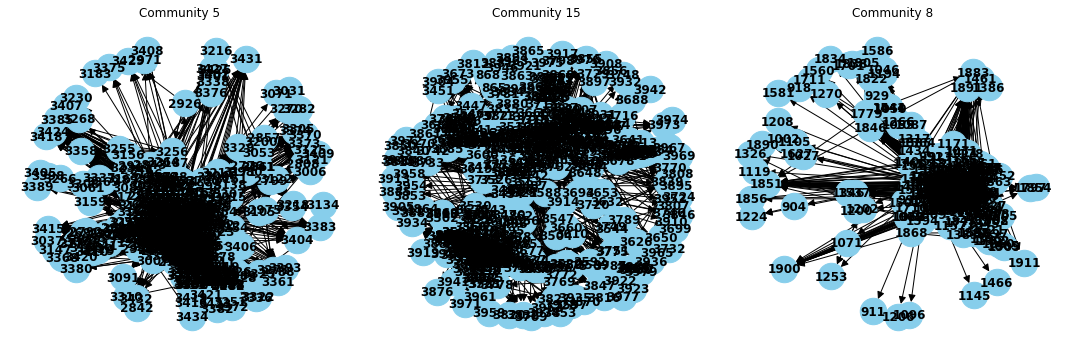

In [46]:
# Find the largest three communities
largest_communities = sorted(community_sizes, key=community_sizes.get, reverse=True)[:3]

# Draw the largest three communities
plt.figure(figsize=(15, 5))
for i, community_id in enumerate(largest_communities, 1):
    plt.subplot(1, 3, i)
    
    community_nodes = [node for node in graph.nodes() if partition[node] == community_id]
    subgraph = graph.subgraph(community_nodes)
    
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", arrowsize=15)
    plt.title(f"Community {community_id}")

plt.tight_layout()
plt.show()

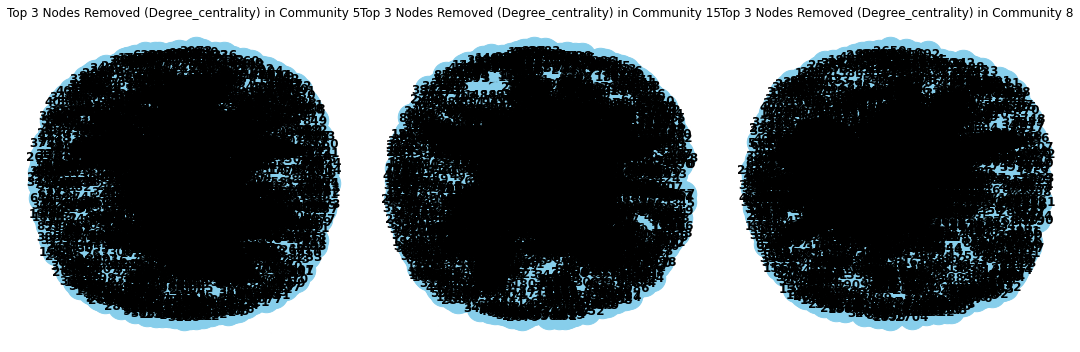

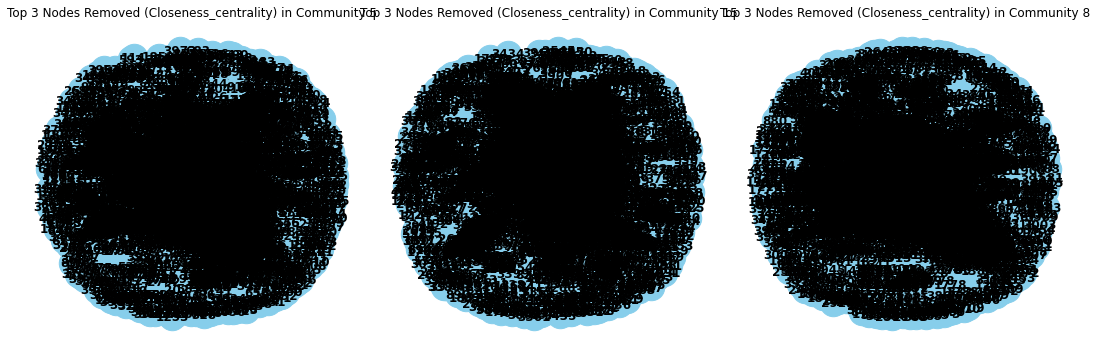

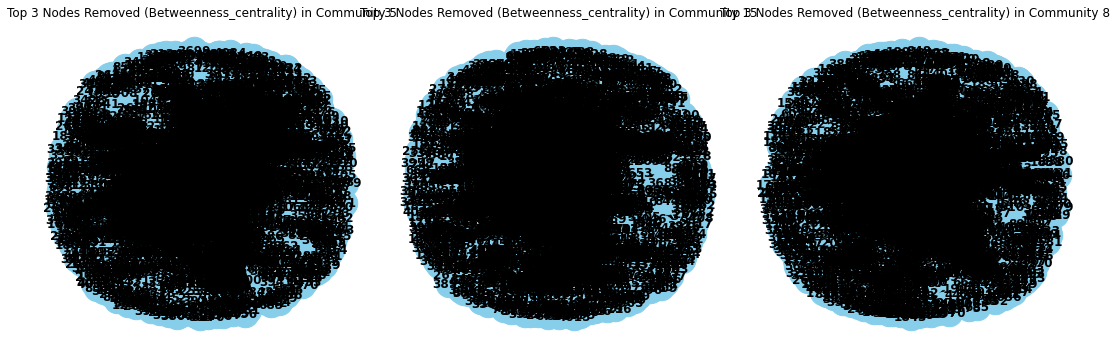

In [54]:
centrality_measures = ['degree_centrality', 'closeness_centrality', 'betweenness_centrality']

for measure in centrality_measures:
    plt.figure(figsize=(15, 5))
    
    for i, community_id in enumerate(largest_communities, 1):
        plt.subplot(1, 3, i)
        
        # Calculate centrality for each node in the community
        if measure == 'degree_centrality':
            centrality_values = dict(nx.degree_centrality(graph.subgraph(community_nodes)))
        elif measure == 'closeness_centrality':
            centrality_values = dict(nx.closeness_centrality(graph.subgraph(community_nodes)))
        elif measure == 'betweenness_centrality':
            centrality_values = dict(nx.betweenness_centrality(graph.subgraph(community_nodes)))
        
        # Remove the top 3 nodes based on centrality measure
        top_nodes = sorted(centrality_values, key=centrality_values.get, reverse=True)[:3]
        graph.remove_nodes_from(top_nodes)
        
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", arrowsize=15)
        plt.title(f"Top 3 Nodes Removed ({measure.capitalize()}) in Community {community_id}")
    
    plt.tight_layout()
    plt.show()

### 10. Draw the influencers of those top 3 communities. 

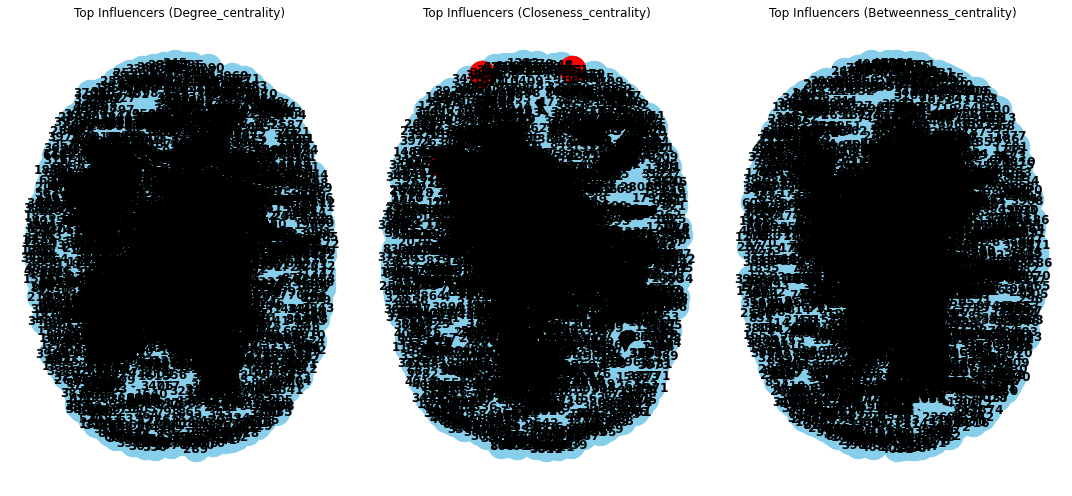

In [55]:
influencers = {}
centrality_measures = ['degree_centrality', 'closeness_centrality', 'betweenness_centrality']

for measure in centrality_measures:
    influencers[measure] = {}
    
    for community_id in largest_communities:
        community_nodes = [node for node in graph.nodes() if partition[node] == community_id]
        
        # Calculate centrality for each node in the community
        if measure == 'degree_centrality':
            centrality_values = dict(nx.degree_centrality(graph.subgraph(community_nodes)))
        elif measure == 'closeness_centrality':
            centrality_values = dict(nx.closeness_centrality(graph.subgraph(community_nodes)))
        elif measure == 'betweenness_centrality':
            centrality_values = dict(nx.betweenness_centrality(graph.subgraph(community_nodes)))
        
        # Identify the node with the highest centrality in the community
        top_node = max(centrality_values, key=centrality_values.get)
        influencers[measure][community_id] = top_node

# Draw the graph highlighting the influencers
plt.figure(figsize=(15, 7))

for i, measure in enumerate(centrality_measures, 1):
    plt.subplot(1, 3, i)
    pos = nx.spring_layout(graph)

    # Draw the entire graph
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", arrowsize=15)

    # Highlight the influencers with a different color
    for community_id, influencer in influencers[measure].items():
        nx.draw_networkx_nodes(graph, pos, nodelist=[influencer], node_color="red", node_size=700)

    plt.title(f"Top Influencers ({measure.capitalize()})")

plt.tight_layout()
plt.show()

#### 11. Design an action plan: 

a. Use hypothetical business (telecom, marketing agency, etc.)
b. Use a hypothetical marketing budget 
c. Use a hypothetical cost per action (advertisement cost) 
d. Decide whom should you target? 

### Action Plan for Telecom Company Marketing Campaign

#### Business Type: 
Telecom Company (providing mobile and internet services)

#### Marketing Budget: 
$100,000

#### Cost per Action (Advertisement Cost):
$2 per click for online advertisements

#### Target Audience:
1. **Demographic:**
   - Age: 18-35
   - Location: Urban and suburban areas
   - Occupation: Students, working professionals

2. **Interests:**
   - Technology enthusiasts
   - Online gamers
   - Social media users

3. **Behavioral:**
   - Regular mobile data users
   - Those interested in high-speed internet services

#### Action Plan:

1. **Objective:**
   Increase brand awareness and acquire new customers for high-speed internet and mobile plans.

2. **Channels:**
   - Online advertising (Google Ads, Social Media Ads)
   - Local community events and sponsorships

3. **Allocating Budget:**
   - Online Advertising: $80,000
   - Local Events and Sponsorships: $20,000

4. **Online Advertising Strategy:**
   - Create engaging and visually appealing ads highlighting high-speed internet and mobile plan benefits.
   - Target ads based on demographics, interests, and online behavior.
   - Monitor and optimize campaigns regularly to maximize ROI.

5. **Local Events and Sponsorships:**
   - Sponsor local community events, sports teams, or tech meetups.
   - Set up booths at events to interact with potential customers.
   - Distribute promotional materials and offer special event discounts.

6. **Measuring Success:**
   - Track online ad performance metrics (click-through rates, conversions).
   - Measure the increase in website traffic and social media engagement.
   - Monitor customer acquisition and retention rates.

7. **Adjusting Strategy:**
   - Analyze data to identify the most effective channels and demographics.
   - Adjust the advertising strategy based on performance.
   - Consider feedback from customers and adapt campaigns accordingly.

8. **Customer Engagement:**
   - Use social media platforms to engage with the audience.
   - Encourage user-generated content and reviews.
   - Respond promptly to customer inquiries and feedback.

9. **Loyalty Programs:**
   - Introduce loyalty programs for existing customers.
   - Offer special discounts or exclusive services for long-term customers.

10. **Partnerships:**
    - Explore partnerships with tech influencers or local businesses.
    - Cross-promote services with other companies for mutual benefit.

11. **Feedback and Analysis:**
    - Gather customer feedback through surveys.
    - Conduct a thorough analysis of the campaign's overall success.
    - Identify areas for improvement in future marketing efforts.